# TAKE HOME LAB K-Nearest Neighbors

* DUE DATE: Feb 13th at 11:55 pm
* CREATED BY: Mary Huibregtse
* **Labs with zero discussion will get zero credit**

KNN is a **lazy**, **non-parametirc**, **classification** algorithm. We say it is _lazy_ (as apposed to _eager_) because it does not make generalizations based on the training data. Rather, it stores the training data and uses **feature similarity** to classify testing data. KNN is _non-parametirc_ because it does not assume underlying distribtuions, and _calssifies_ data based on the closests K similar points. 
Today you will classifying flowers using the _iris_ data set using K-NN from SKlearn.


## Part 1: Data exploration


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as lr
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the iris dataset 
iris = datasets.load_iris()

In [3]:
# move data into pandas dataframe
iris_df = pd.DataFrame(columns=iris.feature_names, data=iris.data)
iris_df['outcome'] = iris.target


In [5]:
# take a look at the description of the data (use data.DESCR)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),outcome
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Part 2:  Draw various graphs that visualize the different species by color.
Create a pairplot where you label the different species by different color. Do this for different combinations of two features on the axes.

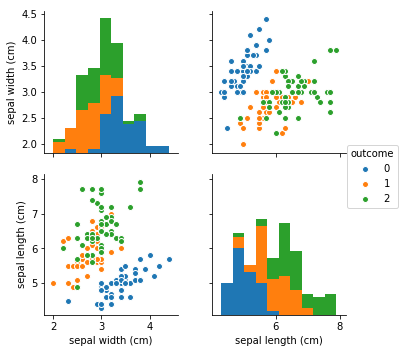

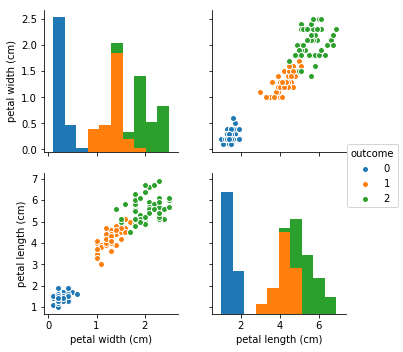

In [15]:
# check out seaborn or matplotlib
import seaborn as sns
sns.pairplot(iris_df, vars=["sepal width (cm)", "sepal length (cm)"],hue="outcome")
sns.pairplot(iris_df, vars=["petal width (cm)", "petal length (cm)"],hue="outcome")




### Part 3:  Classify the flowers' species based on the petal and sepal data (predictors) using K-NN

1. Split your data into a testing (33%) and traing (77%) set
2. Run K-NN classifier using K = 1
3. print the accuracy score of your model and discuss your results
4. Resources: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html,   
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html




In [7]:
#split your data 77%-33% into training and testing, check out train_test_split from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_features, test_feature, train_outcome, test_outcome = train_test_split(iris.data, 
                                                                             iris.target, 
                                                                             train_size = 0.66,
                                                                             test_size = 0.33,
                                                                             random_state = 11)

In [8]:
# 1) run K-nn with k = 1, then fit your training data
# 2) print the .score() of your testing data
# Resources: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn_clf = KNeighborsClassifier(n_neighbors = 1)
knn_preds = knn_clf.fit(train_features, train_outcome).predict(test_feature)
from sklearn.metrics import accuracy_score
accuracy_score(knn_preds, test_outcome)

0.94

### Discuss your resluts here: 

From the KNN classifier, we get an accuracy score of 0.94. This means that the model is 94% accurate in predicting the flower species based on their sepal and petal data. Since the accuracy levels are high, this shows us that the X variables are good predictors for this model.



### Part 4: Improving Your Model: Scaling with MinMaxScaler

Since your classifier uses **distance** to classify data, it is important to _normalize_ our values. This will **eliminate the unit of measurement** so you can compare data from different variables. 

1. standardize your data using MinMaxScaler() (already imported above)
2. split your data into train/test (77%/33%)
2. Run your model with normalized data, k = 1 and print your score
3. Did your results improve? Discuss your results


In [9]:
# code bellow:
scaler = MinMaxScaler()
train_scaled_alt = scaler.fit_transform(train_features)
test_scaled = scaler.fit_transform(test_feature)
train_scared_alt, test_scaled, train_outcome, test_outcome = train_test_split(iris.data, 
                                                                             iris.target, 
                                                                             train_size = 0.66,
                                                                             test_size = 0.33,
                                                                             random_state = 11)
knn_preds = knn_clf.fit(train_scared_alt, train_outcome).predict(test_scaled)
accuracy_score(knn_preds, test_outcome)

0.94

### Discuss your results here: 
Using the MinMaxScaler standardization, we see the same accuracy level as above of 94%. This means that even after normalization all the variables to having one single unit, the strength of the model still remains at 94% accuracy for predicting flower species.

### Part 5: Trying Different K values:

Now use a forloop, GridSearchCV, or pipeline to try k-values 1-15 (with normalized data).

1. Print your best K value and corresponding score
2. Discuss results

In [10]:
# forloop here
accuracies = {}
best = 0
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_preds = knn_clf.fit(train_scared_alt, train_outcome).predict(test_scaled)
    accuracies[k] = accuracy_score(knn_preds, test_outcome)
    if accuracies[k] > best:
        best = accuracies[k]
        max = k
accuracies
print("best k value: " + str(max) + " with accuracy score of " + str(best))




best k value: 5 with accuracy score of 0.98


### Discuss results here: 

To get the best prediction with the KNN classifier, a K-value of 5 results in the highest accuracy value of 98%. With the K-value of 5, we get a high accuracy score because this is the number of clusters in the algorithm is trying to learn from. This value represents the number of cases that are considered to be the "nearest" neighbors. 


### Part 5: Confusion Matrix

Now we will compare our best K predictions with ground truth (actual outcome) using a confusion matrix. 
1. Use model.preds() to get the predictions of your test data
2. Use a confusion matrix to compare results 
3. **Discuss your resuts. How well did your model do in predicting flowers?**
4. Resources: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html, not sure how to read a confusion matrix? look here https://en.wikipedia.org/wiki/Confusion_matrix


In [23]:
# code confusion_matrix here
confusion_matrix(test_outcome, knn_preds)

array([[16,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 18]])

### Discuss your results here:


From this confusion matrix, it looks like the model worked great in predicting flower species. The model was able to differentiate between sepal and petal data to figure out what flower was the outcome. The prediction errors surrounding the matrix are equal to zero, which indicates that the model was able to correctly predict the species. 

